** Homework six (25 Points)**

• (Reading) Ch5, Machine Learning [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/), up to and including Linear Regression; and the in-class reading ** cross_validation_forEconomists ** on polylearn. 

• (UnGraded) DataCamp chapter in Supervised Learning with scikit-learn: **Regression** and **Fine Tuning Your Model**. For the Tuning chapter focus on the lessons including and following (Hyperparameter tuning). Quiz questions will be from these chapters and the reading.

• (Graded) Below notebook on fine tuning your model. If you're working in a group (max 3 people) please do submit it as a group. Submit only one assignment. You will both receive credit. This homework is longer and will count as hw6 and hw7 - 20 points. The code is very similar to our in-class exercise, therefore, points are granted for understanding of the output. 

In [1]:
# Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures

C:\Users\Jerry Wang\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Jerry Wang\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Load the Ladybug data
'''In 1983 an article was published about ladybird beetles and their 
behavior changes under different temperature conditions (N. H. Copp. Animal Behavior, 31,:424-430). 
An experiment was run to see how many beetles stayed in light as temperature changed.
'''

# Read the CSV file into a DataFrame: df
df = pd.read_csv("LadyBugs.csv")

# Create arrays for features (Lighted) and target variable (Temp)
y = df[['Lighted']]
X = df[['Temp']]

In [3]:
# Show the first 5 observations (1 point)
# your code here
df.head(5)

,Temp,Lighted
0,-2,28
1,-1,29
2,0,22
3,1,28
4,2,34


# Linear Regression, Part I  

In [4]:
# (1 point)
# Create training and test sets with 0.3 test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create linear regression object call ols
ols = LinearRegression()
  
# Train the model using the training sets
# your code here
ols.fit(X_train, y_train)

# Report the coefficient 
# your code here 
ols.coef_

array([[ 0.58398762]])

## Plot outputs

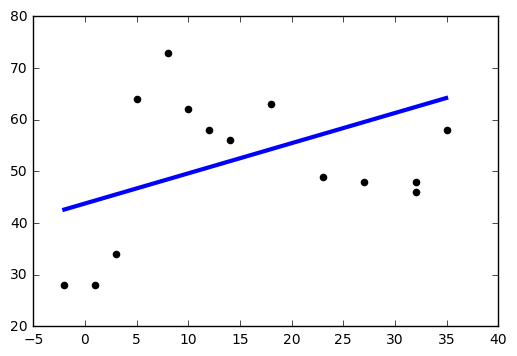

In [5]:
# (1 point)
# This plots the predicted ols fitted line
min = X_test.min()
max = X_test.max() 
predictor_space = pd.DataFrame(np.arange(min, max,  0.05))
plt.plot(predictor_space, ols.predict(predictor_space), color='blue', linewidth=3)

# Scatter plot the actual test data 
# your code here
plt.scatter(X_test, y_test, color='black')

## Predict on the Test data

In [6]:
# Get the predicted y_pred using the test data
y_pred = ols.predict(X_test)

# Compute and print the R^2 and RMSE
print("R^2: {}".format(ols.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -0.040861990028137285
Root Mean Squared Error: 13.45475114818318


## a. Does this plot look like a good fit to the data? # (1 point)
## b. What do out of sample metrics tell you? (1 point)
### 
A. The regression line has low variance as it is linear, but has high bias as it does not predict the data points very well even within the model.
B. The low R^2 shows that the model only explains a little bit of the variance in the sample. The Root Mean Squared Error shows that the model is also not very precise as it is too high to be a great predictor for the data.

# Polynomial Regression, Part II

In [7]:
#(2 points)
# Reload the CSV file into a DataFrame: df
df = pd.read_csv("LadyBugs.csv")

# Create arrays for features (Lighted) and target variable (Temp)
# your code here
y = df[['Lighted']]
X = df[['Temp']]

# Add in 15-degree polynomial of the X variables
poly = PolynomialFeatures(degree = 15)
X1 = pd.DataFrame(poly.fit_transform(X))
print("Dimensions of X after reshaping: {}".format(X.shape))

# Create training and test sets with .3 test size
# your code here
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3)

# Create linear regression object, ols2
# your code here
ols2 = LinearRegression()

# Fit the model using the training sets 
# your code here
ols2.fit(X_train, y_train)

# Report the coefficients
# your code here                    
ols2.coef_  

Dimensions of X after reshaping: (44, 1)


array([[  0.00000000e+00,   5.37114336e-10,  -9.09666783e-13,
          7.67809192e-13,   8.26243102e-12,   8.15346706e-11,
          7.17798796e-10,   5.34161213e-09,   3.01496599e-08,
          9.68109394e-08,  -2.29242367e-08,   2.18126546e-09,
         -1.08953368e-10,   3.02465618e-12,  -4.43079040e-14,
          2.67783235e-16]])

## Plot outputs

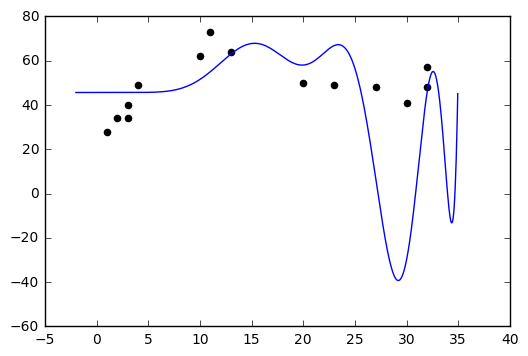

In [8]:
#(1 point)
# This plots the predicted ols fitted line
predictor_space = pd.DataFrame(np.arange(min, max, 0.05)) # Creates prediction space on x interval
predictor_poly = pd.DataFrame(poly.fit_transform(predictor_space)) # Creates data to predict on
plt.plot(predictor_space, ols2.predict(predictor_poly), color='blue') # Plot fitted model 

# Scatter plot the actual test data
# your code here
plt.scatter(X_test.iloc[:,[1]], y_test, color='black')

## Predict on the Test data

In [9]:
#(1 point)
# Predict on the test data: y_pred
# your code here
y_pred = ols2.predict(X_test)

# Computer and print R^2 and RMSE
# your code here
print("R^2: {}".format(ols2.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -2.988362055635382
Root Mean Squared Error: 24.267554791782402


## a. Does this plot look better than the previous OLS plot? (1 point)
## b. Why? What do out of sample metrics tell you? (1 point)
### your answer here
A. It is much more fitted, where there is high bias to the model and lower variance between the model and the points provided in the data as compared to the simple OLS plot.
B. The R^2 shows that the model is a worse fit than a horizontal line as seen by the negative r-squared. That means the model isn't a great at explaining the data. The high Root Mean Squared Error shows that the model is also not very precise as it is too high to be a great predictor for the data.

# Ridge Regression, Part III

In [10]:
#(1 point)
# Read the CSV file into a DataFrame: df
# your code here
df = pd.read_csv('LadyBugs.csv')

# Create arrays for features (Lighted) and target variable (Temp)
# your code here
y = df[['Lighted']]
X = df[['Temp']]

# Add in 15-degree polynomial of the X variables
# your code here
poly = PolynomialFeatures(degree = 15)
X2 = pd.DataFrame(poly.fit_transform(X))
print("Dimensions of X after reshaping: {}".format(X.shape))

# Create training and test sets
# your code here
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3)

# Create a ridge regressor object called ridge with lambda = 0.1
ridge = Ridge(normalize = True, alpha = 0.1)

# Train the ridge model using the training sets (the polynomial factors are in the data)
# your code here
ridge.fit(X_train, y_train)

# The coefficients
# your code here
ridge.coef_

Dimensions of X after reshaping: (44, 1)


array([[  0.00000000e+00,   1.32453637e+00,  -1.81633514e-03,
         -3.80356413e-04,  -1.25111007e-05,  -3.21911712e-07,
         -7.38579022e-09,  -1.53025678e-10,  -2.70087892e-12,
         -3.03016876e-14,   4.47219386e-16,   4.98705560e-17,
          2.48414744e-18,   1.01539809e-19,   3.79082978e-21,
          1.34390969e-22]])

## Plot outputs

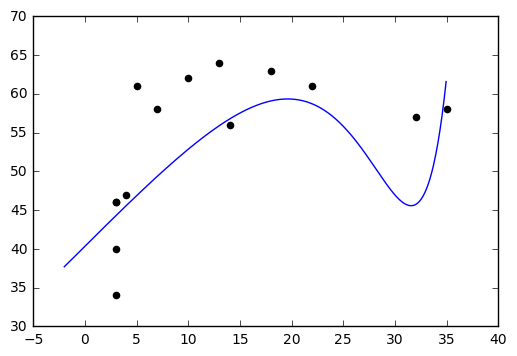

In [11]:
#(1 point)
# This plots the predicted ols fitted line
# your code here (see code above in Part II plot outputs for help)
predictor_space = pd.DataFrame(np.arange(min, max, 0.05)) # Creates prediction space on x interval
predictor_poly = pd.DataFrame(poly.fit_transform(predictor_space)) # Creates data to predict on
plt.plot(predictor_space, ridge.predict(predictor_poly), color='blue') # Plot fitted model 

# Scatter plot the actual test data
# your code here
plt.scatter(X_test.iloc[:,[1]], y_test, color='black')

In [12]:
#(1 point)
# Predict on the test data: y_pred
# your code here
y_pred = ridge.predict(X_test)

# Computer and print R^2 and RMSE
# your code here
print("R^2: {}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.37890984882481704
Root Mean Squared Error: 7.1747891620309066


## a. Does this plot look better than the previous Polynomial plot? (1 point)
## b. Why? What do out of sample metrics tell you? (1 point)
### your answer here
A. It is less fitted, where there is lower bias to the model and higher variance between the model and the points provided in the data as compared to the simple Polynomial plot. It may be a better balance between the Polynomial and the OLS plot between bias and variance.
B. The R^2 shows that the model only explains some of the variance in the sample which isn't very high, but better than the OLS and Polynomial. The Root Mean Squared Error shows that the model is more precise as it is lower than the other two models.

# Get the 5 fold CV Scores (R2) for all 3 models

In [13]:
#(1 points)
ols_scores = cross_val_score(ols, X, y, cv = 5, scoring = 'r2')
print("Cross-validated OLS scores:", ols_scores)

poly_scores = cross_val_score(ols2, X1, y, cv = 5, scoring = 'r2')
print("Cross-validated Polynomial scores:", poly_scores)# your code here
# your code here

# Get the CV Score
ridge_scores = cross_val_score(ridge, X2, y, cv = 5, scoring = 'r2')
print("Cross-validated Ridge scores:", ridge_scores) # your code here
# your code here

Cross-validated OLS scores: [-30.75075459  -0.04556113 -14.29669246  -2.24972457 -29.57476511]
Cross-validated Polynomial scores: [ -2.54060171e+01  -5.74218783e-03  -1.74007772e+01  -3.38514690e+01
  -9.08551523e+14]
Cross-validated Ridge scores: [ -2.33809737e+01   2.19479692e-01  -1.09999672e+01  -4.16344039e-01
  -7.06842774e+04]


## Explain which model if any is best and why. (1 point)
### your answer here
The Ridge Regression is the best as the Cross-validated scores are higher than the other models. It also has the highest R^2 and lowest RMSE.

# Hyper Tune Lambda, K-fold Grid Search, Ridge Regression, Part IV

In [14]:
#(4 points)

# Read the CSV file into a DataFrame: df
# your code here
df = pd.read_csv('Ladybugs.csv')

# Create arrays for features (Lighted) and target variable (Temp)
# your code here
y = df[['Lighted']]
X = df[['Temp']]

# Add in 15-degree polynomial of the X variables
# your code here
poly = PolynomialFeatures(degree = 15)
X2 = pd.DataFrame(poly.fit_transform(X))
print("Dimensions of X after reshaping: {}".format(X.shape))

# Create training and test sets with 0.3 hold out for test data
# your code here
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3)

# Setup a grid of lambdas (aka alphas) called param_grid of 20 lambdas from .001 to 2 
param_grid = {'alpha': np.linspace(0.001, 2.0, num = 20)}

# Create a ridge regressor object called ridge
# your code here
ridge = Ridge(normalize = True)

# Setup the GridSearchCV object called grid_ridge for 5 folds using the param_grid above and ridge object
grid_ridge = GridSearchCV(ridge, param_grid, cv = 5)

# Train the model using the training sets 5 folds for all lambdas!
# your code here
grid_ridge.fit(X_train, y_train)

#Get the best lambda
best = grid_ridge.best_params_ # your code here
print (best)

# Create a final ridge regressor object called ridge_final using the best lambda from hypertuning
ridge_final = Ridge(alpha = best['alpha'], normalize = True)

# Now fit this model on the test data 
# your code here
ridge_final.fit(X_train, y_train)

Dimensions of X after reshaping: (44, 1)
{'alpha': 0.001}


Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

## Plot outputs

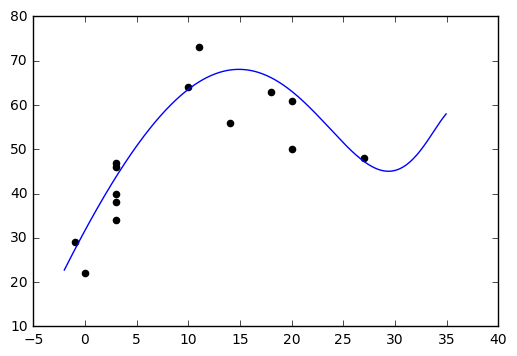

In [15]:
#(1 point)
# This plots the predicted ols fitted line
predictor_space = pd.DataFrame(np.arange(min, max, 0.05)) # Creates prediction space on x interval
predictor_poly = pd.DataFrame(poly.fit_transform(predictor_space)) # Creates data to predict on
plt.plot(predictor_space, ridge_final.predict(predictor_poly), color='blue') # Plot fitted model 

# Scatter plot the actual test data
# your code here
plt.scatter(X_test.iloc[:,[1]], y_test, color='black')

## Final scores given tuned lambda

In [18]:
#(1 point)
# Predict on the test data: y_pred
y_pred = ridge_final.predict(X_test)

# Compute and print R^2 and RMSE
# your code here
ridge_final_scores = cross_val_score(ridge_final, X2, y, cv = 5, scoring = 'r2')
print("Cross-validated Ridge scores:", ridge_final_scores)
print("R^2: {}".format(ridge_final.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Cross-validated Ridge scores: [ -5.15326773e+00   4.89543923e-01  -4.06486061e+00  -1.32638588e+00
  -6.73188206e+06]
R^2: 0.7650993963957727
Root Mean Squared Error: 6.78646435550238


## a. How does your final score (R2) compare to before? (1 point)
## b. What about your fit to the data graphically? (1 point)
## c. Why do you think the fit is better or worse using Ridge and hypertuning your lambda paramater? (2 point)
### your answer here
a. The R^2 is much higher which mean the model explains more of the data.
b. It looks better graphically and seems to fit the data well while not being over-fitted.
c. It is better hypertuning lambda as it smoothed out the model by seemingly stretching out the regression line, better fitting it to the data while also reducing the RMSE.